<a href="https://colab.research.google.com/github/Hannibal730/KONKUK-UNIV_Autonomous-Driving-Competition-with-Behavior-Imitation-modeling/blob/main/6_27_%EC%9E%90%EC%9C%A8%EC%A3%BC%ED%96%89%EB%8C%80%ED%9A%8C_%EC%9D%B4%EB%AF%B8%EC%A7%80%ED%95%99%EC%8A%B5%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip -qq "/content/drive/MyDrive/image.zip"

Total image data =  8531
Epoch 1/13
54/54 [==============================] - 8s 74ms/step - loss: 0.7039 - accuracy: 0.6986 - val_loss: 0.5280 - val_accuracy: 0.7791
Epoch 2/13
54/54 [==============================] - 3s 48ms/step - loss: 0.5545 - accuracy: 0.7658 - val_loss: 0.4937 - val_accuracy: 0.7932
Epoch 3/13
54/54 [==============================] - 2s 37ms/step - loss: 0.5361 - accuracy: 0.7758 - val_loss: 0.4750 - val_accuracy: 0.7973
Epoch 4/13
54/54 [==============================] - 1s 27ms/step - loss: 0.5124 - accuracy: 0.7825 - val_loss: 0.4726 - val_accuracy: 0.7991
Epoch 5/13
54/54 [==============================] - 1s 27ms/step - loss: 0.4972 - accuracy: 0.7882 - val_loss: 0.4539 - val_accuracy: 0.8032
Epoch 6/13
54/54 [==============================] - 1s 26ms/step - loss: 0.4855 - accuracy: 0.7881 - val_loss: 0.4651 - val_accuracy: 0.7991
Epoch 7/13
54/54 [==============================] - 1s 28ms/step - loss: 0.4840 - accuracy: 0.7950 - val_loss: 0.4770 - val_accur

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


54/54 [==============================] - 1s 7ms/step - loss: 0.4557 - accuracy: 0.8026
Valid Accuracy: 0.8025776147842407
Valid Loss: 0.4556809067726135
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


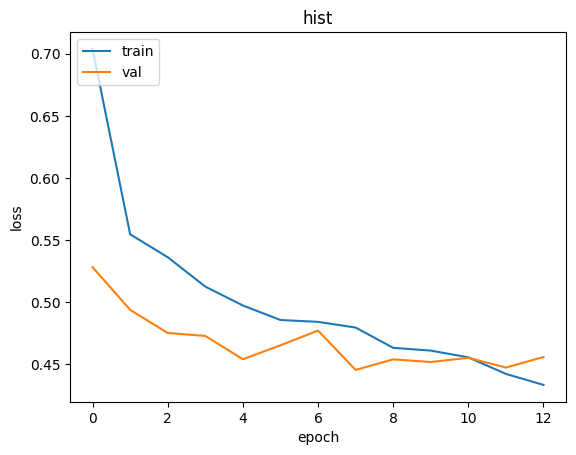

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


# 이미지 경로, 라벨을 저장할 리스트 만들기
data = []
labels = []
test = []

# 이미지 데이터를 갖고오고 라벨링: 직진
data_path = "/content/go"
for img in os.listdir(data_path):
    image = cv2.imread(os.path.join(data_path, img))
    data.append(image)
    test.append(img)
    labels.append(0)  # 라벨 0

# 이미지 데이터를 갖고오고 라벨링: 좌회전
data_path = "/content/left"
for img in os.listdir(data_path):
    image = cv2.imread(os.path.join(data_path, img))
    data.append(image)
    test.append(img)
    labels.append(1)  # 라벨 1

# 이미지 데이터를 갖고오고 라벨링: 우회전
data_path = "/content/right"
for img in os.listdir(data_path):
    image = cv2.imread(os.path.join(data_path, img))
    data.append(image)
    test.append(img)
    labels.append(2)  # 라벨 2




# 데이터를 -1에서 1 범위로 전처리할 거임
print("Total image data = ", len(data))
data = (np.array(data, dtype='float32')/127.5) -1
#float32타입으로 배열 만들고, 127.5로 나눔. 덕분에 0부터255였던 범위가 0부터2로 바뀜. 그리고 -1하면 -부터1로 바뀜.

#opencv로 만든 이미지라서 BGR->우린 텐서플로 써야 하니까 RGB로 순서 바꿔야 함
# ::-1  마지막 축을 기준으로 역순
data = data[:,:,::-1]
#넘파이 배열로 변환
labels = np.array(labels)


X_train, X_valid, Y_train, Y_valid = train_test_split(data, labels, test_size=0.2, random_state=42 )

# CNN
model = tf.keras.Sequential() #차곡차곡
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
# 64*64*3(RGB) 입력-> 3*3짜리 필터가 64개 -> 컨볼루젼-> 렐루에 입력

model.add(layers.MaxPooling2D((2, 2)))
# 2*2 영역에서 최대값 추출해서 풀링 ->32,32,64

model.add(layers.Conv2D(128, (3, 3), activation='relu'))  #->32,32,128
model.add(layers.MaxPooling2D((2, 2))) #->16,16,128
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #-> 16,16,64
model.add(layers.MaxPooling2D((2, 2))) #->8,8,64
model.add(layers.Conv2D(32, (3, 3), activation='relu')) #->8,8,32
model.add(layers.Flatten()) #-> 사이즈는 8*8*32
model.add(layers.Dense(64, activation='relu')) #-> 8*8*32짜리 벡터를 64개의 노드에 완전연결시켜서 64짜리 벡터로
model.add(layers.Dropout(0.5)) #과적합 방지로 절반 떨굼
model.add(layers.Dense(3, activation='softmax')) #라벨이 세 종류였잖아

# 모델 학습
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# sparse_categorical_crossentropy는 라벨링이 정수형태일 때 사용하는 교차엔트로피 오차
# 참고로 categorical_crossentropy는 라벨링이 원핫 인코딩일 때 쓰는 교차엔트로피 오차

# adam: Adaptive Moment Estimation의 약자로, 경사 하강법의 변형 알고리즘입니다.
#학습 속도를 자동으로 조절하면서 빠르게 수렴하도록 합니다.
#모멘텀과 RMSProp을 결합한 방식으로, 모멘텀은 이전 그라디언트를 사용하여 학습 속도를 증가시키고, RMSProp은 그라디언트의 크기를 조정하여 안정적인 학습을 가능하게 합니다.

# 성능 평가지표는 예측값과 실제값의 일치 (정확도) 정도

history = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs=13, batch_size = 128)

# 모델 저장 (h5 포맷)
model.save('.//keras_model.h5')

# 모델 저장 (tflite)
# pip install flatbuffers==2.0 --break-system-packages
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('keras_model.tflite', 'wb') as f:
  f.write(tflite_model)

# x_test, y_test를 사용하여 모델 평가
valid_loss, valid_accuracy = model.evaluate(X_valid, Y_valid)

print(f"Valid Accuracy: {valid_accuracy}")
print(f"Valid Loss: {valid_loss}")
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('hist')
plt.show()
